In [26]:
import pandas as pd
import os

In [33]:
dataframes = []
for file in os.listdir("datasets"):
    path = os.path.join("datasets",file)
    frame = pd.read_csv(path)
    dataframes.append(frame)

In [34]:
# Create dataframe for state, COCs, and total homelessness
PIT_index = [0, 2, 3, 6]
PIT_frames = []
for num in PIT_index: 
    temp_frame = dataframes[num][dataframes[num].columns[0:3]]
    PIT_frames.append(temp_frame)

In [35]:
PIT_frames[0].columns

Index(['State', 'Number of CoCs', 'Overall Homeless, 2020'], dtype='object')

In [36]:
PIT_frames[3].head()

,State,Number of CoCs,"Overall Homeless, 2017"
0,AK,2,"1,845"
1,AL,8,"3,793"
2,AR,6,"2,467"
3,AZ,3,"8,947"
4,CA,43,"131,532"


In [37]:
# loop through frames and format for maps
year = 2017
index = 3
map_frames = []
while index >= 0:
    df = PIT_frames[index].rename(columns={f'Overall Homeless, {year}': 'Overall Homeless'})
    df["Overall Homeless"] = df["Overall Homeless"].str.replace(',', '')
    map_frames.append(df)
    index = index - 1
    year = year + 1

In [38]:
for frame in map_frames:
    print(frame.columns)
map_frames[0].head()

Index(['State', 'Number of CoCs', 'Overall Homeless'], dtype='object')
Index(['State', 'Number of CoCs', 'Overall Homeless'], dtype='object')
Index(['State', 'Number of CoCs', 'Overall Homeless'], dtype='object')
Index(['State', 'Number of CoCs', 'Overall Homeless'], dtype='object')


,State,Number of CoCs,Overall Homeless
0,AK,2,1845
1,AL,8,3793
2,AR,6,2467
3,AZ,3,8947
4,CA,43,131532


In [39]:
map_frames[1].head()

,State,Number of CoCs,Overall Homeless
0,AK,2,2016
1,AL,8,3434
2,AR,7,2712
3,AZ,3,9865
4,CA,43,129972


In [40]:
map_frames[2].head()

,State,Number of CoCs,Overall Homeless
0,AK,2,1907
1,AL,8,3261
2,AR,5,2717
3,AZ,3,10007
4,CA,44,151278


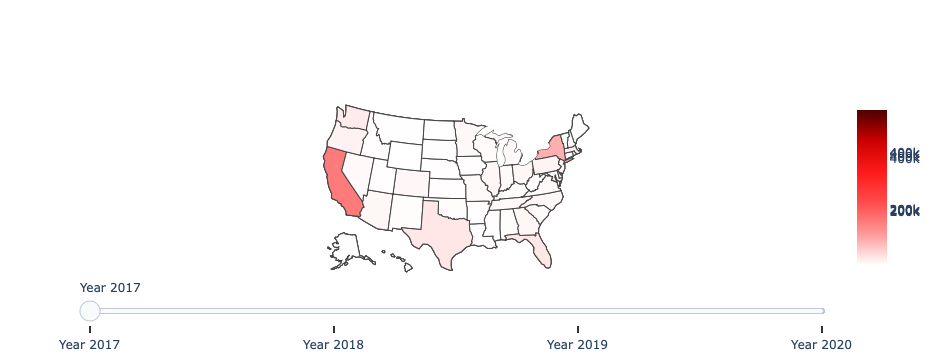

'homeless_map.html'

In [42]:
# Create Choropleth map for overall homeless by year

import pandas as pd
import plotly
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


init_notebook_mode(connected=True)

years = [2017, 2018, 2019, 2020]

# Color Scale
scl = [[0.0, '#ffffff'],[0.2, '#ff9999'],[0.4, '#ff4d4d'], \
       [0.6, '#ff1a1a'],[0.8, '#cc0000'],[1.0, '#4d0000']] # reds

data_slider = []

start_year = 2017
index = 0

for year in years: 

    df = map_frames[index]
    index = index + 1
    for col in df.columns: 
        df[col] = df[col].astype(str)

    data_one_year = dict(
                        type='choropleth',
                        locations = df['State'],
                        z = df['Overall Homeless'].astype(float),
                        locationmode='USA-states',
                        colorscale = scl,
                        text = df['Number of CoCs'],
                        )

    data_slider.append(data_one_year) 

steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 2017))
    step['args'][1][i] = True
    steps.append(step)


sliders = [dict(active=0, pad={"t": 1}, steps=steps)]  

layout = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders)


fig = dict(data=data_slider, layout=layout) 

plotly.offline.iplot(fig)


offline.plot(fig, auto_open=True, image = 'png', image_filename="homeless_map" ,image_width=2000, image_height=1000, 
              filename='homeless_map.html', validate=True)

In [43]:
change_frame = dataframes[5]
change_frame.rename(columns={"Unnamed: 0": "year"}, inplace=True)
change_frame.head()

,State,"Change in Total Homelessness, 2019-2020","Change in Total Homelessness, 2018-2020","Change in Total Homelessness, 2017-2020","Change in Total Homelessness, 2016-2020","Change in Total Homelessness, 2015-2020","Change in Total Homelessness, 2014-2020","Change in Total Homelessness, 2013-2020","Change in Total Homelessness, 2012-2020","Change in Total Homelessness, 2011-2020","Change in Total Homelessness, 2010-2020","Change in Total Homelessness, 2009-2020","Change in Total Homelessness, 2008-2020","Change in Total Homelessness, 2007-2020"
0,AK,2.20%,-3.30%,5.60%,0.50%,-0.40%,9.20%,0.20%,1.90%,-8.40%,4.60%,-2.20%,18.40%,18.70%
1,AL,2.80%,-2.40%,-11.70%,-18.50%,-15.60%,-26.50%,-28.50%,-35.70%,-39.70%,-44.60%,-44.90%,-37.80%,-38.50%
2,AR,-12.90%,-12.80%,-4.10%,-3.90%,-7.60%,-19.40%,-37.90%,-43.90%,-30.90%,-14.30%,-17.00%,-27.30%,-38.30%
3,AZ,9.70%,11.30%,22.70%,13.10%,10.90%,4.60%,3.90%,-2.90%,4.50%,-19.90%,-25.40%,-12.10%,-25.00%
4,CA,6.80%,24.30%,22.80%,36.70%,39.60%,41.80%,36.30%,34.50%,29.10%,30.80%,30.60%,18.30%,16.20%


In [44]:
change_2017 = change_frame[['State', 'Change in Total Homelessness, 2017-2020']].copy()
change_2017.head()

,State,"Change in Total Homelessness, 2017-2020"
0,AK,5.60%
1,AL,-11.70%
2,AR,-4.10%
3,AZ,22.70%
4,CA,22.80%


In [45]:
change_2018 = change_frame[['State', 'Change in Total Homelessness, 2018-2020']].copy()
change_2018.head()

,State,"Change in Total Homelessness, 2018-2020"
0,AK,-3.30%
1,AL,-2.40%
2,AR,-12.80%
3,AZ,11.30%
4,CA,24.30%


In [46]:
change_2019 = change_frame[['State', 'Change in Total Homelessness, 2019-2020']].copy()
change_2019.head()

,State,"Change in Total Homelessness, 2019-2020"
0,AK,2.20%
1,AL,2.80%
2,AR,-12.90%
3,AZ,9.70%
4,CA,6.80%


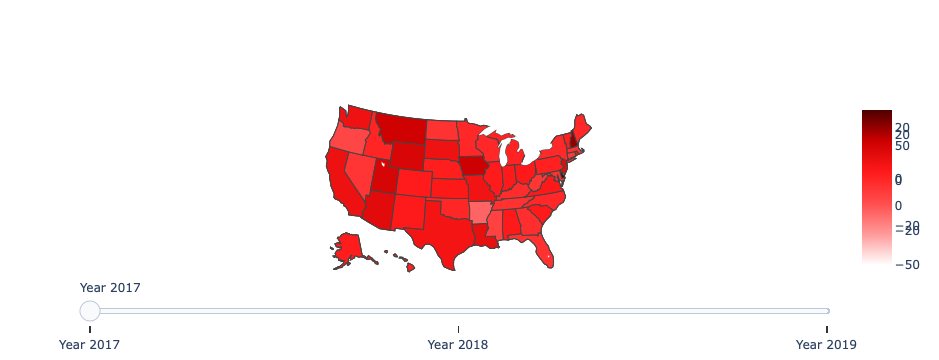

'change_in_homeless_map.html'

In [48]:
# Create map for change in homelessness

years = [2017, 2018, 2019]
frames = [change_2017,change_2018, change_2019]

# Color Scale
scl = [[0.0, '#ffffff'],[0.2, '#ff9999'],[0.4, '#ff4d4d'], \
       [0.6, '#ff1a1a'],[0.8, '#cc0000'],[1.0, '#4d0000']] # reds

data_slider = []

start_year = 2017
index = 0

for year in years: 

    df = frames[index]
    index = index + 1
    for col in df.columns: 
        df[col] = df[col].astype(str)

    data_one_year = dict(
                        type='choropleth',
                        locations = df['State'],
                        z = df[f'Change in Total Homelessness, {year}-2020'].str.replace('%','').astype(float),
                        locationmode='USA-states',
                        colorscale = scl
                        )

    data_slider.append(data_one_year) 

steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 2017))
    step['args'][1][i] = True
    steps.append(step)


sliders = [dict(active=0, pad={"t": 1}, steps=steps)]  

layout = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders)


fig = dict(data=data_slider, layout=layout) 

plotly.offline.iplot(fig)


offline.plot(fig, auto_open=True, image = 'png', image_filename="change_in_homeless_map" ,image_width=2000, image_height=1000, 
              filename='change_in_homeless_map.html', validate=True)